In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>1. Data gathering and inspection</h2>

In [2]:
data="/Users/dobaophuc/Documents/học data analyst/dataset/lalaiga 2 all player final - lalaiga 2 all player.csv"
df = pd.read_csv(data)
df.head()

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,15.0,5.0,NaN,1.0,3.8,79,1.6,7.0,7.53
1,Karim Benzema,Real Madrid,35,FW,15,1306,11.0,3.0,1.0,NaN,4.7,87,0.7,4.0,7.45
2,Antoine Griezmann,Atletico,31,AM(CLR) FW,18(7),1693,8.0,8.0,NaN,NaN,2.6,81.5,0.8,5.0,7.45
3,Vinícius Júnior,Real Madrid,22,AM(L) FW,24,2122,8.0,4.0,8.0,NaN,2.5,82.3,NaN,4.0,7.38
4,Pedri,Barcelona,20,AM(CL),18(3),1634,6.0,NaN,2.0,NaN,0.8,88.5,NaN,3.0,7.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  542 non-null    object 
 1   Team-name    542 non-null    object 
 2   Age          542 non-null    int64  
 3   Position     542 non-null    object 
 4   App          541 non-null    object 
 5   MinP         542 non-null    int64  
 6   Goals        216 non-null    float64
 7   Assist       206 non-null    float64
 8   YC           394 non-null    float64
 9   RC           92 non-null     float64
 10  SPG          440 non-null    float64
 11  PS%          542 non-null    object 
 12  AW           456 non-null    float64
 13  MOTM         151 non-null    float64
 14  Rating       542 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 63.6+ KB


In [4]:
df.describe()

,Age,MinP,Goals,Assist,YC,RC,SPG,AW,MOTM,Rating
count,542.000000,542.000000,216.000000,206.000000,394.000000,92.000000,440.000000,456.000000,151.000000,542.000000
mean,26.843173,897.415129,2.652778,1.932039,3.134518,1.108696,0.808864,0.887061,1.629139,6.477675
std,4.704124,663.629943,2.512257,1.207797,1.997371,0.376698,0.634748,0.732831,1.080839,0.311721
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,0.100000,1.000000,4.630000
25%,23.000000,280.500000,1.000000,1.000000,1.000000,1.000000,0.400000,0.400000,1.000000,6.252500
50%,27.000000,862.500000,2.000000,2.000000,3.000000,1.000000,0.600000,0.700000,1.000000,6.490000
75%,30.000000,1445.250000,3.000000,2.000000,4.000000,1.000000,1.025000,1.200000,2.000000,6.670000
max,41.000000,2250.000000,15.000000,8.000000,10.000000,3.000000,4.700000,5.600000,7.000000,7.530000


In [5]:
df.duplicated().any()

False

<h2>2. Exploratory Data Analytics</h2>

<p><strong>Context:</strong> Top 3 competitors for the Laliga title are usually <strong>Barcelona, Real Maldrid</strong> and <strong>Atletico</strong>. This analysis, thus, would mainly concentrate on these 3 big guys, to provide some meaningful insights about why the winners win and the losers lose.</p>

<h3>Age distribution</h3>

In [120]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

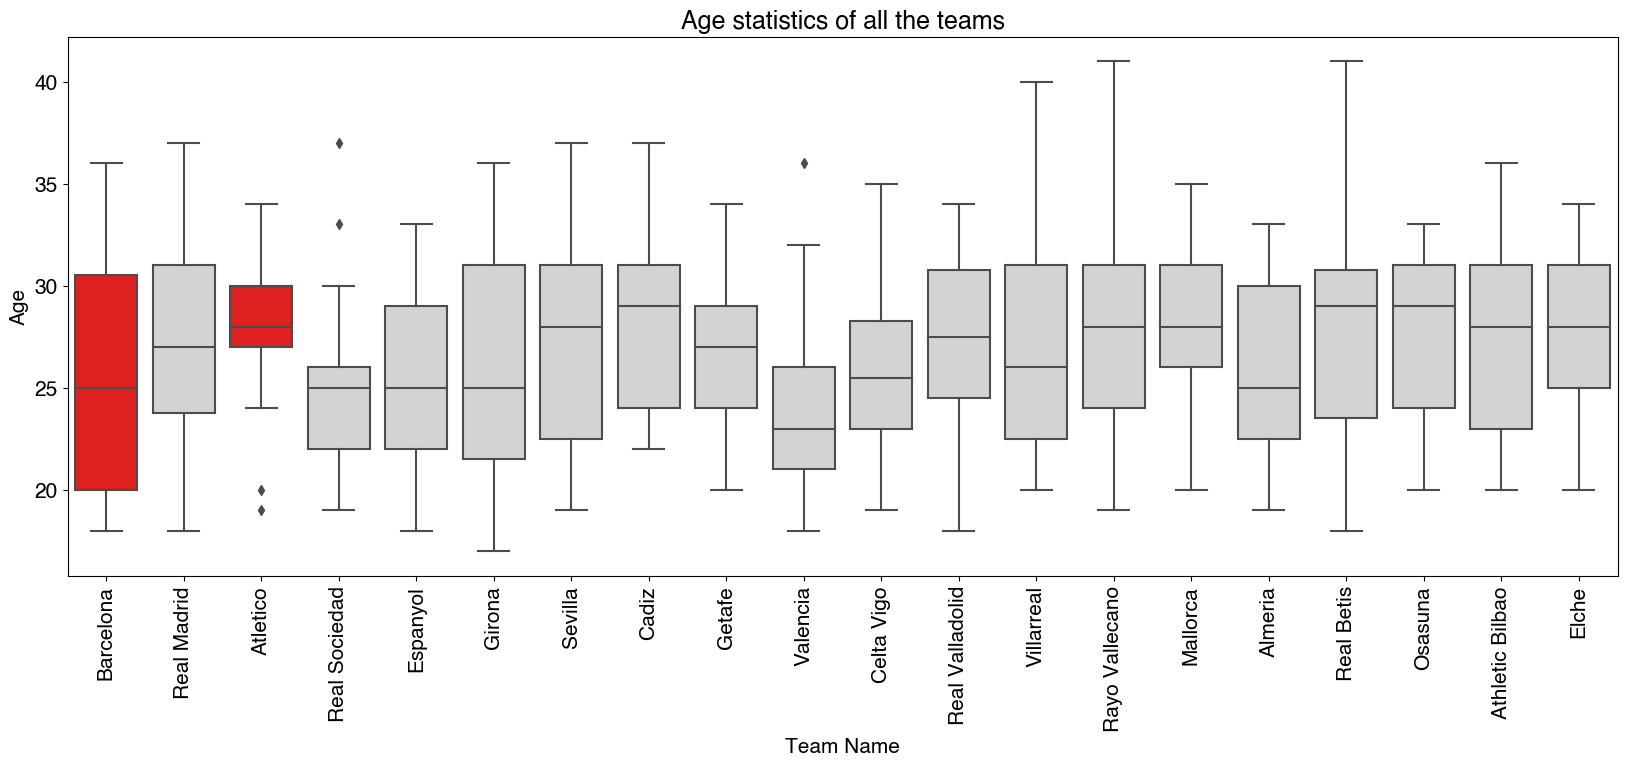

In [122]:
plt.figure(figsize= (20,7))
colors=[]
for i in df['Team-name'].unique():
    if i == 'Barcelona' or i == 'Atletico':
        colors.append('red')
    else:
        colors.append('lightgrey')
sns.boxplot(x='Team-name',y='Age',data=df, palette=colors)
plt.title('Age statistics of all the teams')
plt.xlabel('Team Name')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

<p><strong>Comment:</strong> It can be seen that <strong>Atletico</strong> has the <strong>highest</strong> age median among the top 3, especially compared with <strong>Barcelona</strong>.</p>

<h3>Age mean</h3>

In [7]:
Agemean = df.groupby(['Team-name'], as_index=False)['Age'].mean()
Agemean = Agemean.sort_values(by='Age')

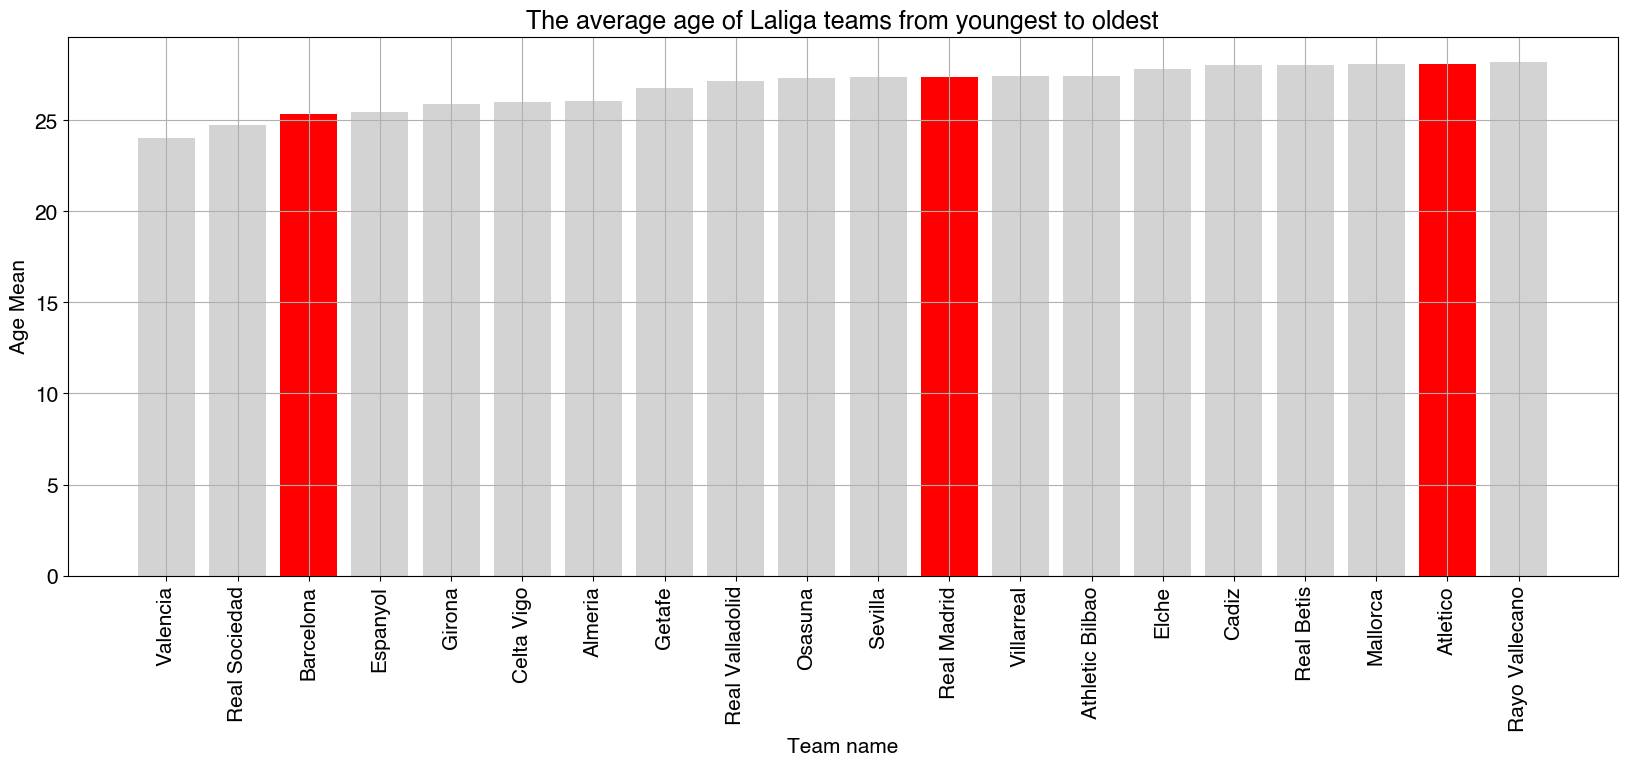

In [123]:
plt.figure(figsize=(20,7))
colors=[]
for i in Agemean['Team-name'].unique():
    if i == 'Barcelona' or i == 'Atletico' or i== 'Real Madrid':
        colors.append('red')
    else:
        colors.append('lightgrey')
plt.bar(Agemean['Team-name'],Agemean['Age'], color=colors)
plt.title('The average age of Laliga teams from youngest to oldest')
plt.xlabel('Team name')
plt.ylabel('Age Mean')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<p><strong>Comment:</strong> It can be seen that <strong>Atletico</strong> lies in the oldest teams, while <strong>Barcelona</strong> contains comparatively younger squad. This would help Barcelona maintain and develop their play style and strategies in the next seasons</p>

<h3>CDF - Cumulative Distribution Function</h3>

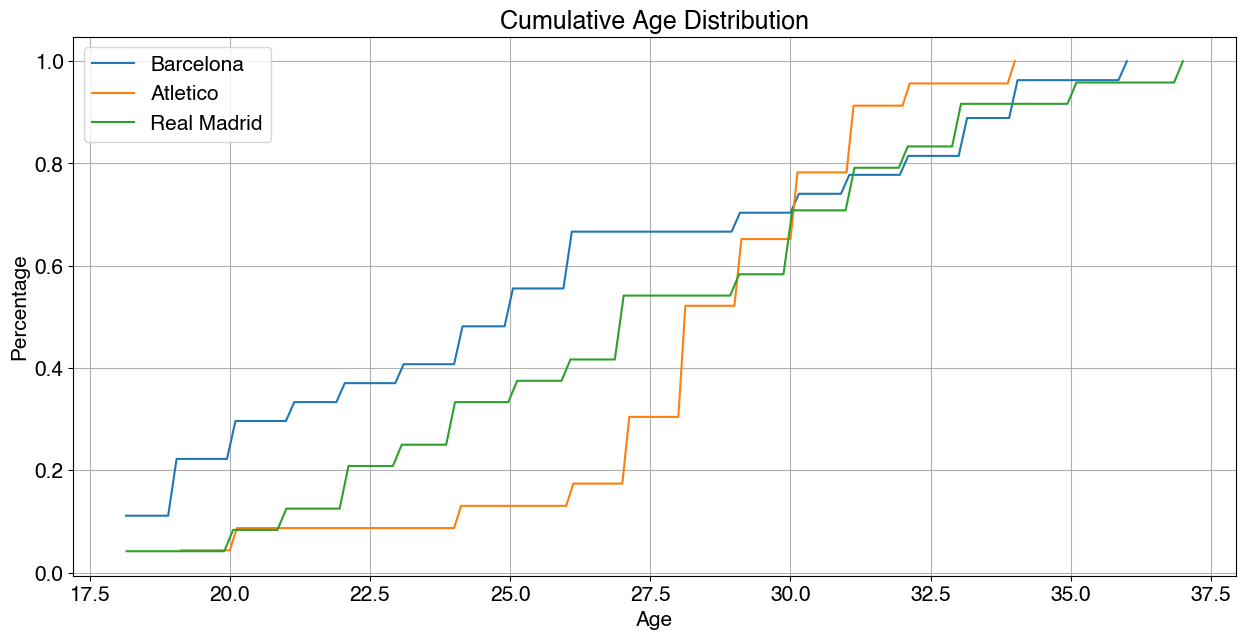

In [124]:
dfbar = df[df['Team-name']=='Barcelona']
dfatl = df[df['Team-name']=='Atletico']
dfmad = df[df['Team-name']=='Real Madrid']

plt.figure(figsize=(15,7))

count1, bins_count1 = np.histogram(dfbar['Age'],bins=120)
pdf1 = count1/sum(count1)
cdf1 = np.cumsum(pdf1)
plt.plot(bins_count1[1:],cdf1,label='Barcelona')

count2, bins_count2 = np.histogram(dfatl['Age'],bins=120)
pdf2 = count2/sum(count2)
cdf2 = np.cumsum(pdf2)
plt.plot(bins_count2[1:],cdf2,label='Atletico')

count3, bins_count3 = np.histogram(dfmad['Age'],bins=120)
pdf3 = count3/sum(count3)
cdf3 = np.cumsum(pdf3)
plt.plot(bins_count3[1:],cdf3,label='Real Madrid')
plt.title('Cumulative Age Distribution')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.show()

<p><strong>Comment:</strong> It can be clearly seen from this chart that <strong>less than 20%</strong> players of Atletico aged 26 and under, while young players aged U26 account for more than <strong>50%</strong> and <strong>60%</strong> in Real Madrid and Barcelona respectively.</p>

In [71]:
dfgoals = df[['Team-name','Age','Goals']].groupby(['Team-name'], as_index=False)['Goals'].sum()
dfgoals.sort_values(by='Goals', ascending = False, inplace = True)

dfgoalsage = pd.concat([dfgoals,Agemean], axis=1).reset_index(drop=True).T.drop_duplicates().T
dfgoalsage

,Team-name,Goals,Age
0,Real Madrid,50.0,27.375
1,Barcelona,47.0,25.37037
2,Atletico,34.0,28.086957
3,Girona,33.0,25.888889
4,Athletic Bilbao,32.0,27.44
5,Real Sociedad,31.0,24.724138
6,Espanyol,31.0,25.448276
7,Real Betis,30.0,28.033333
8,Villarreal,28.0,27.407407
9,Sevilla,28.0,27.366667


In [74]:
dfgoalsage[['Goals','Age']] = dfgoalsage[['Goals','Age']].astype(float)
dfgoalsage.dtypes

Team-name     object
Goals        float64
Age          float64
dtype: object

<h3>Age - Goal Correlation</h3>

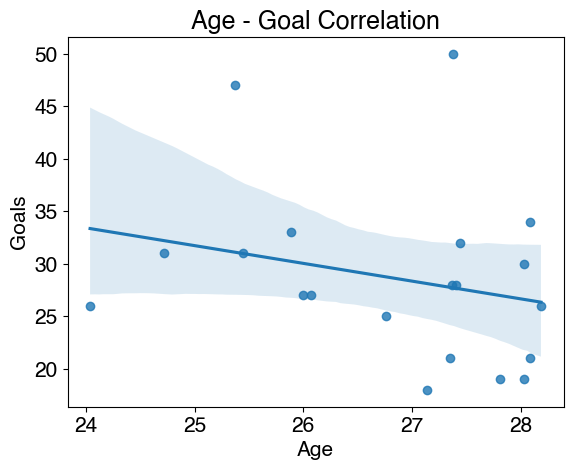

In [125]:
sns.regplot(x='Age',y='Goals',data=dfgoalsage)
plt.title('Age - Goal Correlation')
plt.show()

In [76]:
dfgoalsage.corr()

,Goals,Age
Goals,1.000000,-0.250699
Age,-0.250699,1.000000


<p><strong>Comment:</strong> The average Age is shown to have a <strong>negative correlation</strong> with a team's goal number, though the statistical meaning is not significant (~-0.25)</p>

<h3>Main contributors to the teams' goals</h3>

In [102]:
goal = df.groupby('Team-name')['Goals'].sum()
df['Teamgoal']=df['Team-name'].apply(lambda team_name: goal[team_name])
df['Goalrate']=df['Goals']/df['Teamgoal']
df1 = df.sort_values(by='Goalrate', ascending = False)
df1.head()

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating,Teamgoal,Goalrate
17,Enes Ünal,Getafe,25,FW,25,2190,12.0,3.0,4.0,NaN,2.5,63.6,3.9,3.0,7.08,25.0,0.480000
27,Vedat Muriqi,Mallorca,28,FW,22,1923,10.0,2.0,5.0,1.0,2.3,58.1,5.6,3.0,7.02,21.0,0.476190
19,Iago Aspas,Celta Vigo,35,AM(CR) FW,23(2),2108,11.0,3.0,3.0,NaN,2.4,79.2,0.8,2.0,7.07,27.0,0.407407
7,Joselu,Espanyol,32,FW,21(23),1909,12.0,2.0,3.0,NaN,2.5,61.6,5.6,4.0,7.22,31.0,0.387097
109,Borja Iglesias,Real Betis,30,FW,21(2),1692,11.0,3.0,1.0,1.0,2.1,74.8,0.7,1.0,6.71,30.0,0.366667


In [113]:
import plotly.express as px

fig = px.scatter(df[df['Goalrate']>=0.1], x="Goalrate", y="Team-name", size="Goals", hover_name="Player Name", log_x=True, width=800, height=600, title='Clubs with players scoring more than 10% of the team goals')
xaxis_title='% Goal Contribute of Player'
yaxis_title='Team Name'
fig.show()

<p><strong>Comment:</strong> While there are many options for scoring goals in Real Madrid, Barcelona is quite dependent on Lewandowski who delivered <strong>32%</strong> of the team goal. This could be the reason why they can't compete with Real Madrid in a long-term race like Laliga, though they have just won Real Madrid in the latest match. Meanwhile, A.Griezmann and A.Morata are delivering more than <strong>50%</strong> of Atletico goals.</p>

<h2>Thanks for watching my analysis!</h2>